# Example MNIST classifier

## Imports + model initialization

For the 1st model initialization, you have to pass all required configuration asargument to the constructor. 

After this creation, you **do not need** to repass them all the time ! just call its constructor with `nom = model_name` and all configuration will be automatically loaded !

In [1]:
import pandas as pd

from utils import plot, plot_multiple, set_display_options
from datasets import get_dataset, prepare_dataset, test_dataset_time
from models.classification.base_classifier import BaseClassifier

set_display_options()

model_name = 'mnist_classifier'

In [2]:
input_shape = (28, 28, 1)
model = BaseClassifier(input_shape, labels = list(range(10)), nom = model_name)

print(model)

Initializing submodel : classifier !
Submodel classifier saved in pretrained_models\mnist_classifier\saving\classifier.json !
Model mnist_classifier initialized successfully !

========== mnist_classifier ==========
Sub model classifier
- Inputs 	: (None, 28, 28, 1)
- Outputs 	: (None, 10)
- Number of layers 	: 15
- Number of parameters 	: 0.028 Millions
- Model not compiled

Already trained on 0 epochs (0 steps)

Labels : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Multi-class : False



## Model instanciation + dataset loading

In [2]:
model = BaseClassifier(nom = model_name)

model.compile()

print(model)
model.summary()

Model restoration...
Initializing submodel : classifier !
Successfully restored classifier from pretrained_models/mnist_classifier/saving/classifier.json !
Model mnist_classifier initialized successfully !
Optimizer 'classifier_optimizer' initilized successfully !
Submodel classifier compiled !
  Loss : {'reduction': 'auto', 'name': 'sparse_categorical_crossentropy', 'from_logits': False}
  Optimizer : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
  Metrics : [{'name': 'sparse_categorical_accuracy', 'dtype': 'float32'}]

========== mnist_classifier ==========
Sub model classifier
- Inputs 	: (None, 28, 28, 1)
- Outputs 	: (None, 10)
- Number of layers 	: 15
- Number of parameters 	: 0.028 Millions
- Optimizer 	: {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
- Loss 	 : {'reduction': 'auto', 'name': 'sparse_categorical_crossentropy', 'f

In [3]:
ds = get_dataset('mnist')

train, valid = ds['train'], ds['test']
print(train)
print(valid)

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


## Training + history analysis

In [4]:
model.train(
    train, validation_data = valid,
    epochs = 5, batch_size = 64,
    augment_prct = 0.25
)

Training config :
HParams :
- augment_prct	: 0.25
- epochs	: 15
- batch_size	: 64
- valid_batch_size	: 32
- test_batch_size	: 1
- verbose	: 1
- train_size	: None
- valid_size	: None
- test_size	: 4
- pred_step	: -1
- shuffle_size	: 1024

Epoch 11/15
    938/Unknown - 6s 6ms/step - loss: 0.0612 - classifier_SparseCategoricalAccuracy: 0.9805
Saving at epoch 10 !

Making prediction at step 10318
938/938 [==============================] - 11s 11ms/step - loss: 0.0612 - classifier_SparseCategoricalAccuracy: 0.9805 - val_loss: 0.0295 - val_classifier_SparseCategoricalAccuracy: 0.9903
Epoch 12/15
929/938 [============================>.] - ETA: 0s - loss: 0.0610 - classifier_SparseCategoricalAccuracy: 0.9804
Saving at epoch 11 !

Making prediction at step 11256
938/938 [==============================] - 9s 9ms/step - loss: 0.0610 - classifier_SparseCategoricalAccuracy: 0.9804 - val_loss: 0.0276 - val_classifier_SparseCategoricalAccuracy: 0.9904
Epoch 13/15
934/938 [============================

===== History =====
        loss  classifier_SparseCategoricalAccuracy  val_loss  val_classifier_SparseCategoricalAccuracy
0   0.348025                              0.889050  0.074104                                    0.9751
1   0.137937                              0.957350  0.061631                                    0.9788
2   0.111529                              0.964933  0.044514                                    0.9861
3   0.094828                              0.970300  0.040400                                    0.9859
4   0.087542                              0.972867  0.043843                                    0.9850
5   0.079722                              0.974783  0.042376                                    0.9873
6   0.073642                              0.976317  0.034817                                    0.9883
7   0.072488                              0.976867  0.032599                                    0.9890
8   0.067662                              0.978700  0

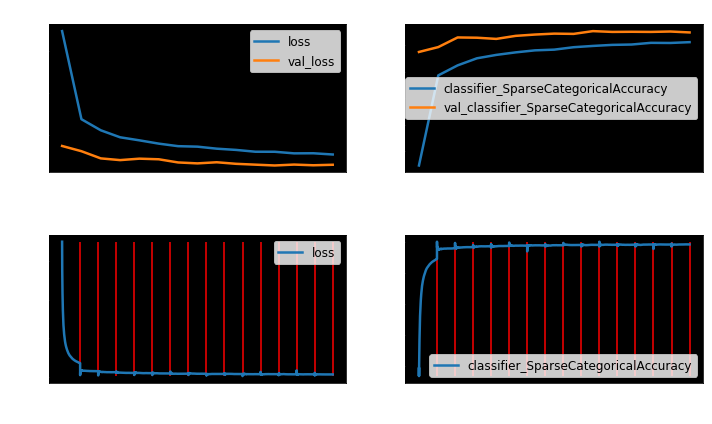

In [5]:
print(model.history)
model.plot_history()

In [4]:
print("Training config :")
print(pd.DataFrame(model.history.trainings_config))
print("\nTraining informations :")
print(pd.DataFrame(model.history.trainings_infos))


Training config :
   augment_prct  epochs  batch_size  valid_batch_size  test_batch_size  verbose train_size valid_size  \
0          0.25       5          64                32                1        1       None       None   
1          0.25      10          64                32                1        1       None       None   
2          0.25      15          64                32                1        1       None       None   

   test_size  pred_step  shuffle_size  
0          4         -1          1024  
1          4         -1          1024  
2          4         -1          1024  

Training informations :
                 start                  end       time  interrupted  start_epoch  final_epoch
0  2021-04-04 13:14:33  2021-04-04 13:15:20  46.396827        False           -1            4
1  2021-04-04 13:49:49  2021-04-04 13:50:37  47.229387        False            4            9
2  2021-04-04 11:55:50  2021-04-04 11:56:40  49.691502        False            9           14


## Prediction

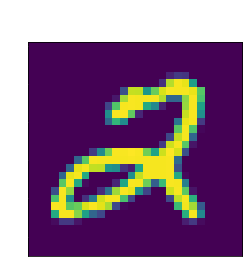

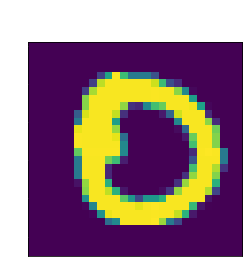

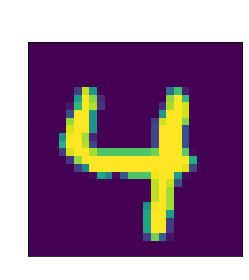

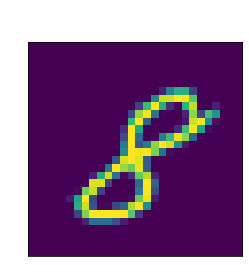

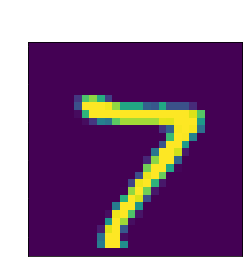

In [4]:
for i, data in enumerate(valid):
    if i >= 5: break
    image, label = data['image'], data['label']
    
    pred, score = model.predict(image)[0]
    plot(
        image, title = 'Class : {}\nPred : {} ({:.2f}%)'.format(label, pred, score * 100),
        plot_type = 'imshow'
    )

## Test dataset performance

These 3 lines allow you to debug your processing pipeline and test its performances

In [5]:
config = model.get_dataset_config(is_validation = False, batch_size = 128)

ds_train = prepare_dataset(train, ** config, debug = True)
test_dataset_time(ds_train, steps = 1000)

0it [00:00, ?it/s]

Original dataset : <DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
- Dataset after mapping : <DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int32)>
- Dataset after batch : <DatasetV1Adapter shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int32)>


469it [00:02, 185.60it/s]


469 batchs in 2.532 sec sec (185.229 batch / sec)
Batch infos : 
Element 0 : shape : (96, 28, 28, 1) - type : <dtype: 'float32'> - min : 0.000 - max : 1.000
Element 1 : shape : (96,) - type : <dtype: 'int32'> - min : 0.000 - max : 9.000


2.5320005416870117